In [1]:
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [2]:
dataset=pd.read_csv('C:/Users/OFFICE/Deep Learning practice/Times Series Analysis files/AirPassengers.csv')
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
dataset.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [4]:
dataset.dtypes

Month          object
#Passengers     int64
dtype: object

In [5]:
dataset = pd.DataFrame(dataset)

# Convert the '#Passengers' column to numeric
dataset['#Passengers'] = pd.to_numeric(dataset['#Passengers'], errors='coerce')

# Check the data types after conversion
print(dataset.dtypes)

Month          object
#Passengers     int64
dtype: object


In [6]:
dataset=dataset.dropna()

In [7]:
type(dataset.Month)

pandas.core.series.Series

In [8]:
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])
indexedDataset#.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


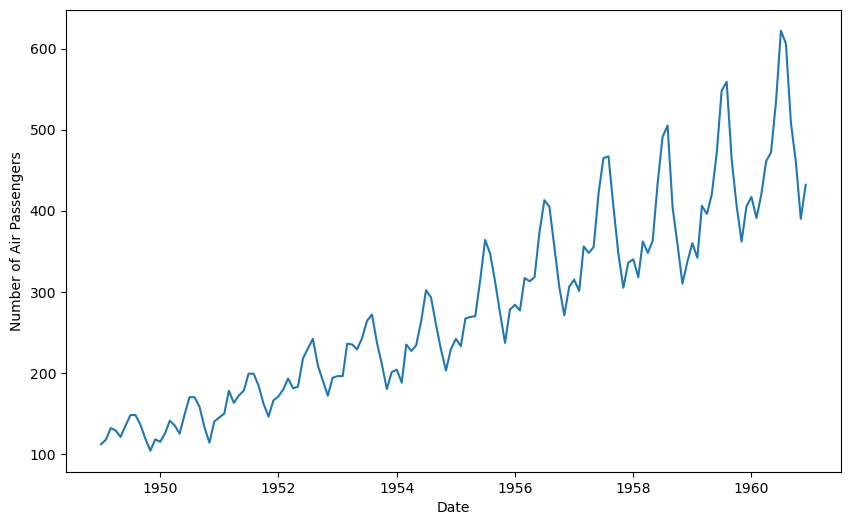

In [9]:
plt.xlabel('Date')
plt.ylabel('Number of Air Passengers')
plt.plot(indexedDataset)

In [10]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window =12 ).std()

In [11]:
rolmean

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


In [12]:
rolstd

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,83.630500
1960-09-01,84.617276
1960-10-01,82.541954


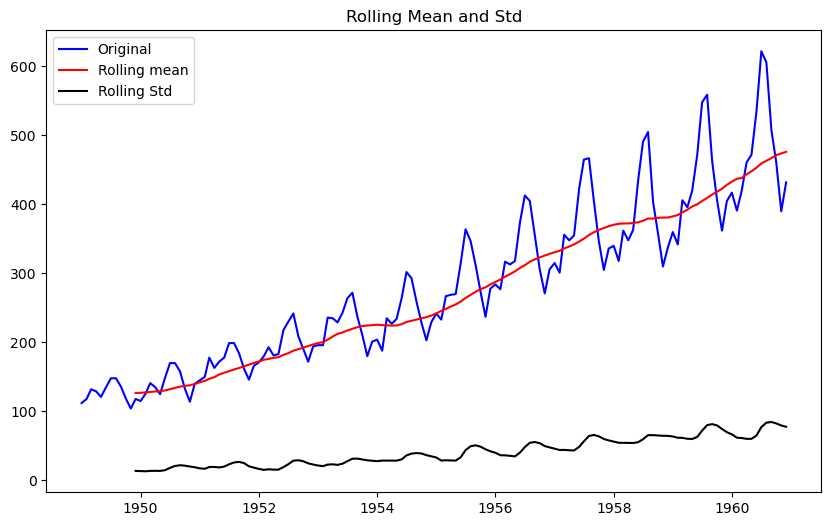

In [13]:
orig =plt.plot(indexedDataset, color ='blue', label = 'Original')

mean= plt.plot(rolmean, color= 'red', label ='Rolling mean')

std= plt.plot(rolstd, color = 'black', label = 'Rolling Std')

plt.legend(loc= 'best')
plt.title('Rolling Mean and Std')
plt.show()

In [14]:
print('results of Dickey Fuller Test: ')
dftest = adfuller(indexedDataset['#Passengers'], autolag='AIC')
dftest

results of Dickey Fuller Test: 


(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [15]:
dfoutput = pd.Series(dftest[0:4], index=['TestStatistic', 'Pvalue', 'Lags Used','Number of observations used']
                    )
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
    
print(dfoutput)

TestStatistic                    0.815369
Pvalue                           0.991880
Lags Used                       13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


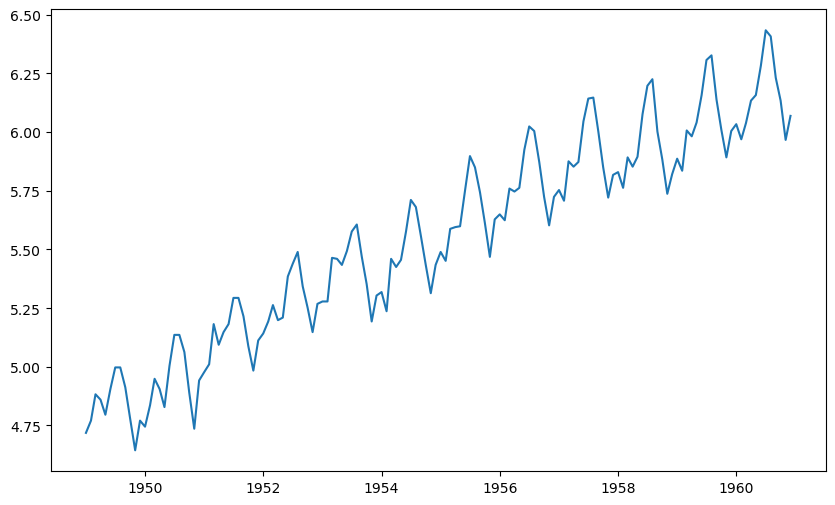

In [16]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

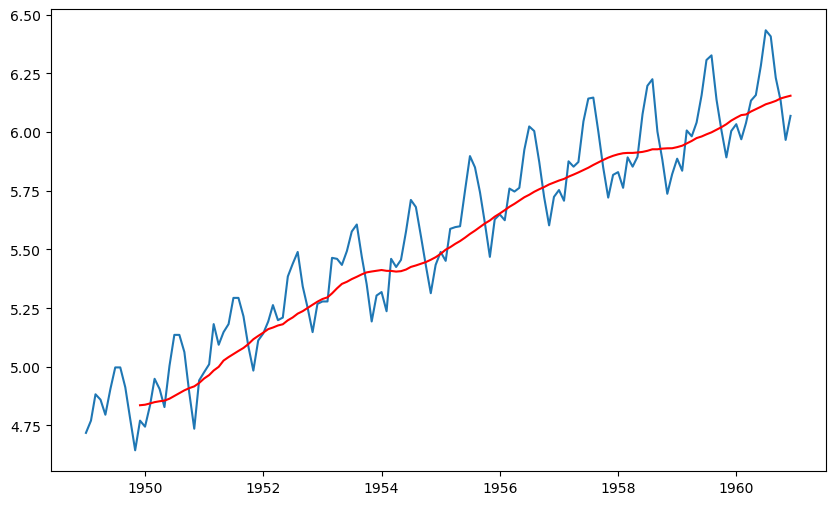

In [17]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
moivingSTD = indexedDataset_logScale.rolling(window=12).std()

plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [18]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
datasetLogScaleMinusMovingAverage

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [19]:
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window =12).mean()
    movingSTD = timeseries.rolling(window =12).std()
    
    orig  = plt. plot(timeseries, color = 'blue', label = 'original')
    mean = plt.plot(movingAverage, color='red', label = 'Rolling Mean')
    std = plt. plot(movingSTD, color='black', label ='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard Deviation')
    plt.show(block=False)
    
    print('Result of Dickey fullerTest:')
    
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)

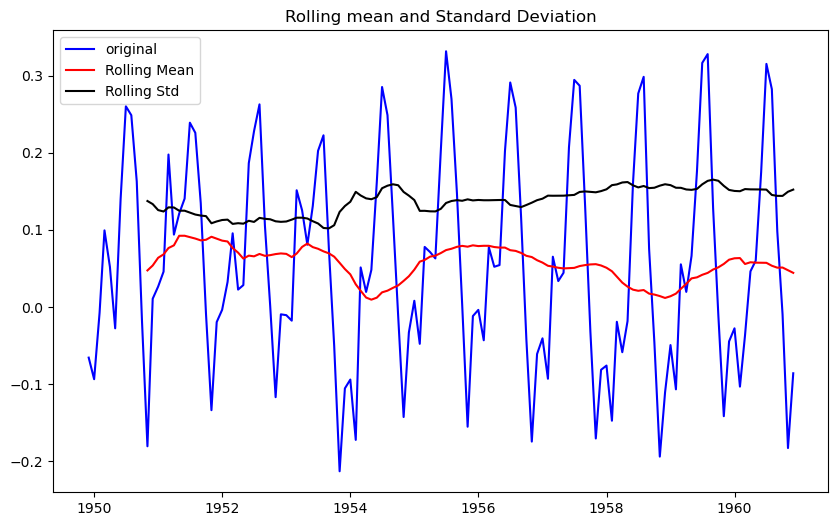

Result of Dickey fullerTest:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64


In [20]:
test_stationarity(datasetLogScaleMinusMovingAverage)

# Exponential Decay Transformation

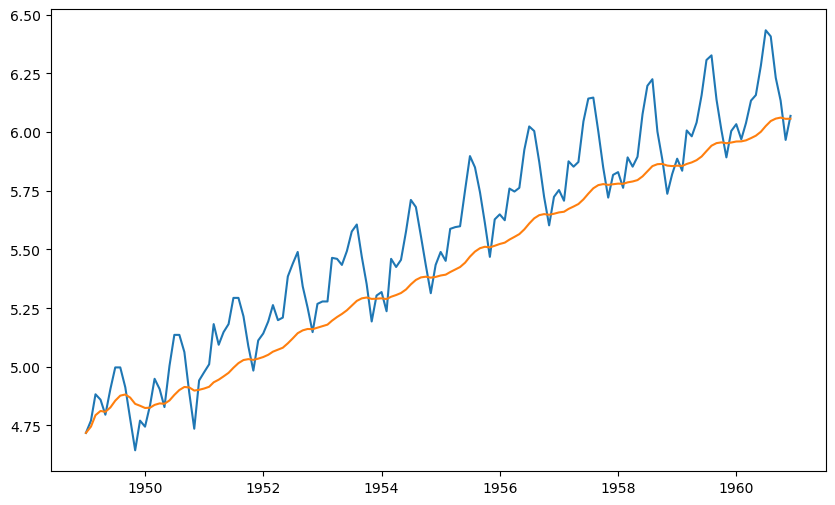

In [21]:
exponentialDecayWeightAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust =True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightAverage)

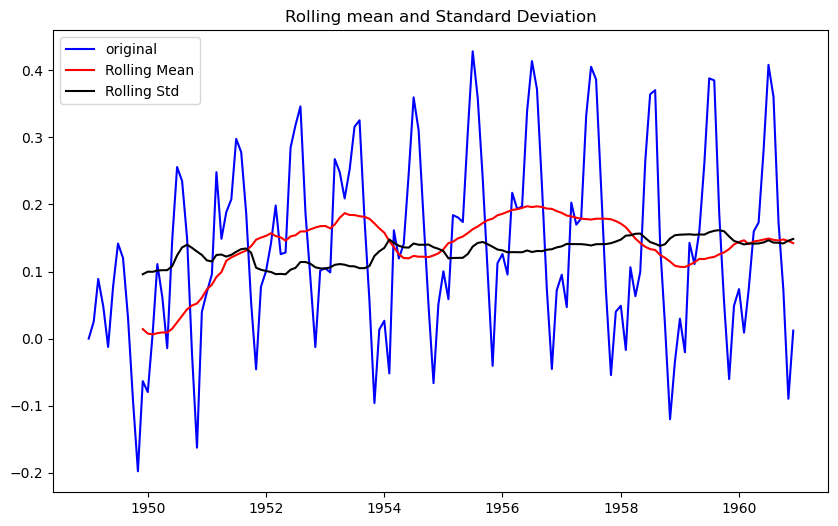

Result of Dickey fullerTest:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [22]:
datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale-exponentialDecayWeightAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

# Time Shift Transformation

In [23]:
indexedDataset_logScale.shift().head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,4.718499
1949-03-01,4.770685
1949-04-01,4.882802
1949-05-01,4.859812


In [24]:
indexedDataset_logScale.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


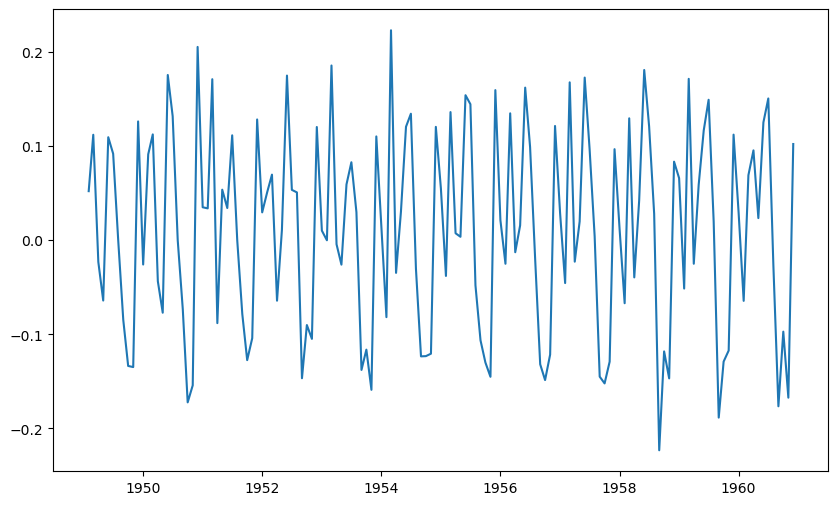

In [25]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)
plt.show()

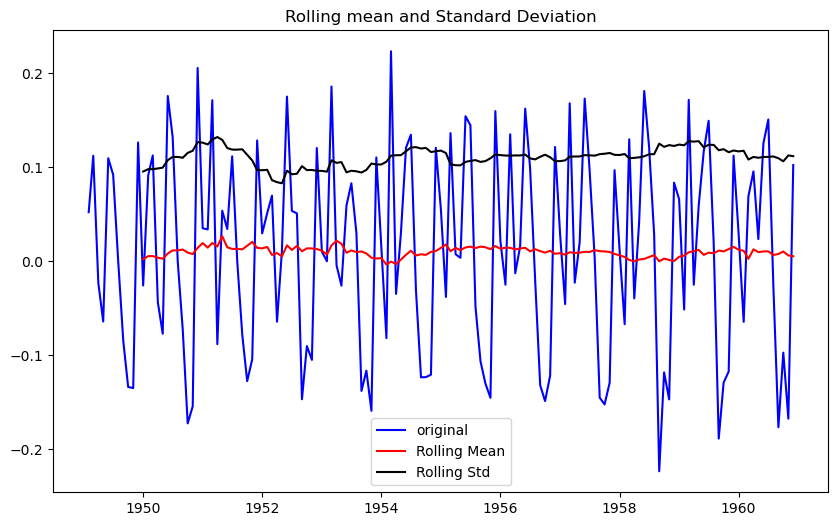

Result of Dickey fullerTest:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical value (1%)             -3.482501
Critical value (5%)             -2.884398
Critical value (10%)            -2.578960
dtype: float64


In [26]:
datasetLogDiffShifting.dropna(inplace = True)
test_stationarity(datasetLogDiffShifting)

In [27]:
import scipy.stats as stats

# Sample data for an example hypothesis test
sample_data = [20, 22, 25, 18, 24, 21, 23, 19, 22, 20]

# Perform a one-sample t-test (for demonstration purposes)
# Null hypothesis: The population mean is 20
# Alternative hypothesis: The population mean is not 20

population_mean = 20
t_statistic, p_value = stats.ttest_1samp(sample_data, population_mean)

# Set your significance level (alpha)
alpha = 0.05  # You can choose a different alpha if needed

# Make a decision based on the p-value and threshold
if p_value < alpha:
    print(f"P-value ({p_value}) is less than alpha ({alpha}). Reject the null hypothesis.")
else:
    print(f"P-value ({p_value}) is greater than or equal to alpha ({alpha}). Fail to reject the null hypothesis.")


P-value (0.07739253968675402) is greater than or equal to alpha (0.05). Fail to reject the null hypothesis.


In [28]:
sum(sample_data)/len(sample_data)

21.4

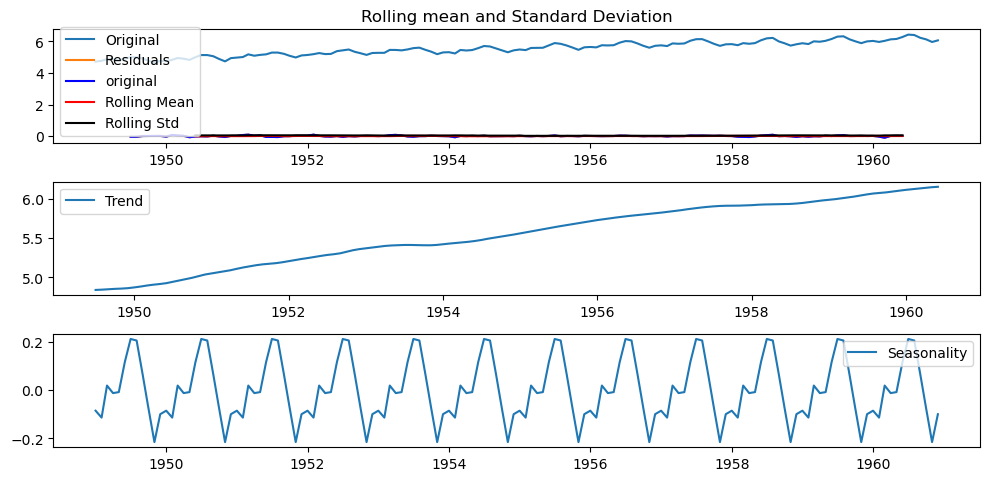

Result of Dickey fullerTest:


KeyError: '#Passengers'

In [29]:
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition. resid

plt.subplot(411)
plt.plot(indexedDataset_logScale,label = 'Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label= 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(411)
plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')

plt.tight_layout()


decomposedLogData = residual

decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)